## scikit-learn中的多项式回归和Pipeline

In [22]:
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [24]:
# 多项式回归其实是对数据的预处理(升维)
# 所以存在于preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [25]:
# 添加最多几次幂
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [26]:
X2.shape

(100, 3)

In [27]:
X[:5,:]

array([[-0.38905699],
       [ 2.95481613],
       [ 1.87297888],
       [ 0.96401209],
       [-0.96747705]])

In [28]:
# 最开始的列是0次方，1次方，二次方
X2[:5,:]

array([[ 1.        , -0.38905699,  0.15136534],
       [ 1.        ,  2.95481613,  8.73093839],
       [ 1.        ,  1.87297888,  3.5080499 ],
       [ 1.        ,  0.96401209,  0.9293193 ],
       [ 1.        , -0.96747705,  0.93601184]])

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

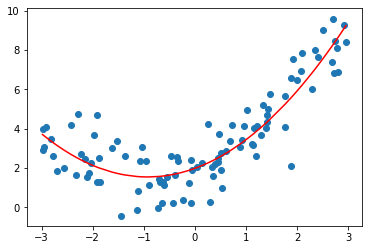

In [30]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [31]:
lin_reg2.coef_

array([0.       , 0.9486703, 0.5113727])

In [32]:
lin_reg2.intercept_

1.9864135595758838

### 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)

In [13]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2.shape

(5, 6)

In [16]:
# 0次幂，1次幂两个，2次幂3个，分别是a^2, a*b, b^2
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline
方便使用多项式回归的方法
使用多项式回归的时候，需要

1. 建立多项式矩阵

2. 进行归一化(因为次数越高，指数爆炸)

3. 进行线性回归训练

使用Pipeline的话可以直接一步进行回归

In [17]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 管道传入的是每一步对应的类。使用元组，第一个是名字，第二个是实例

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [18]:
# 直接进行fit和predict即可
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

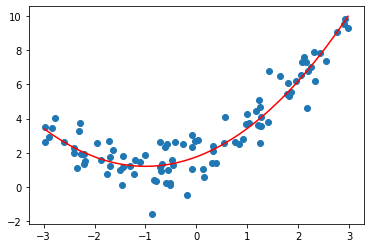

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()